In [142]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [143]:
data = pd.read_csv('Filtered_data_from_lab1.csv')

In [144]:
#                                QUestion 1


#finding the medion , following the instructions mentioned in the question

X = data.iloc[:, list(range(0, 5)) + list(range(6, 18))]
Y = data['charges']
median_age = X['age'].median()
print(f'Median age is =====>', median_age)

Median age is =====> 39.0


In [145]:
#                                   Question 2 

#As per the question we would need MinMaxScaler


from sklearn.preprocessing import MinMaxScaler

X.columns = map(str, X.columns)

# Scaling  the data using MinMaxScaler


scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Calculate the median age after scaling
median_age_scaled = X_scaled['age'].median()

# Print the result
print("Median age ====>",(median_age_scaled))

Median age ====> 0.4565217391304348


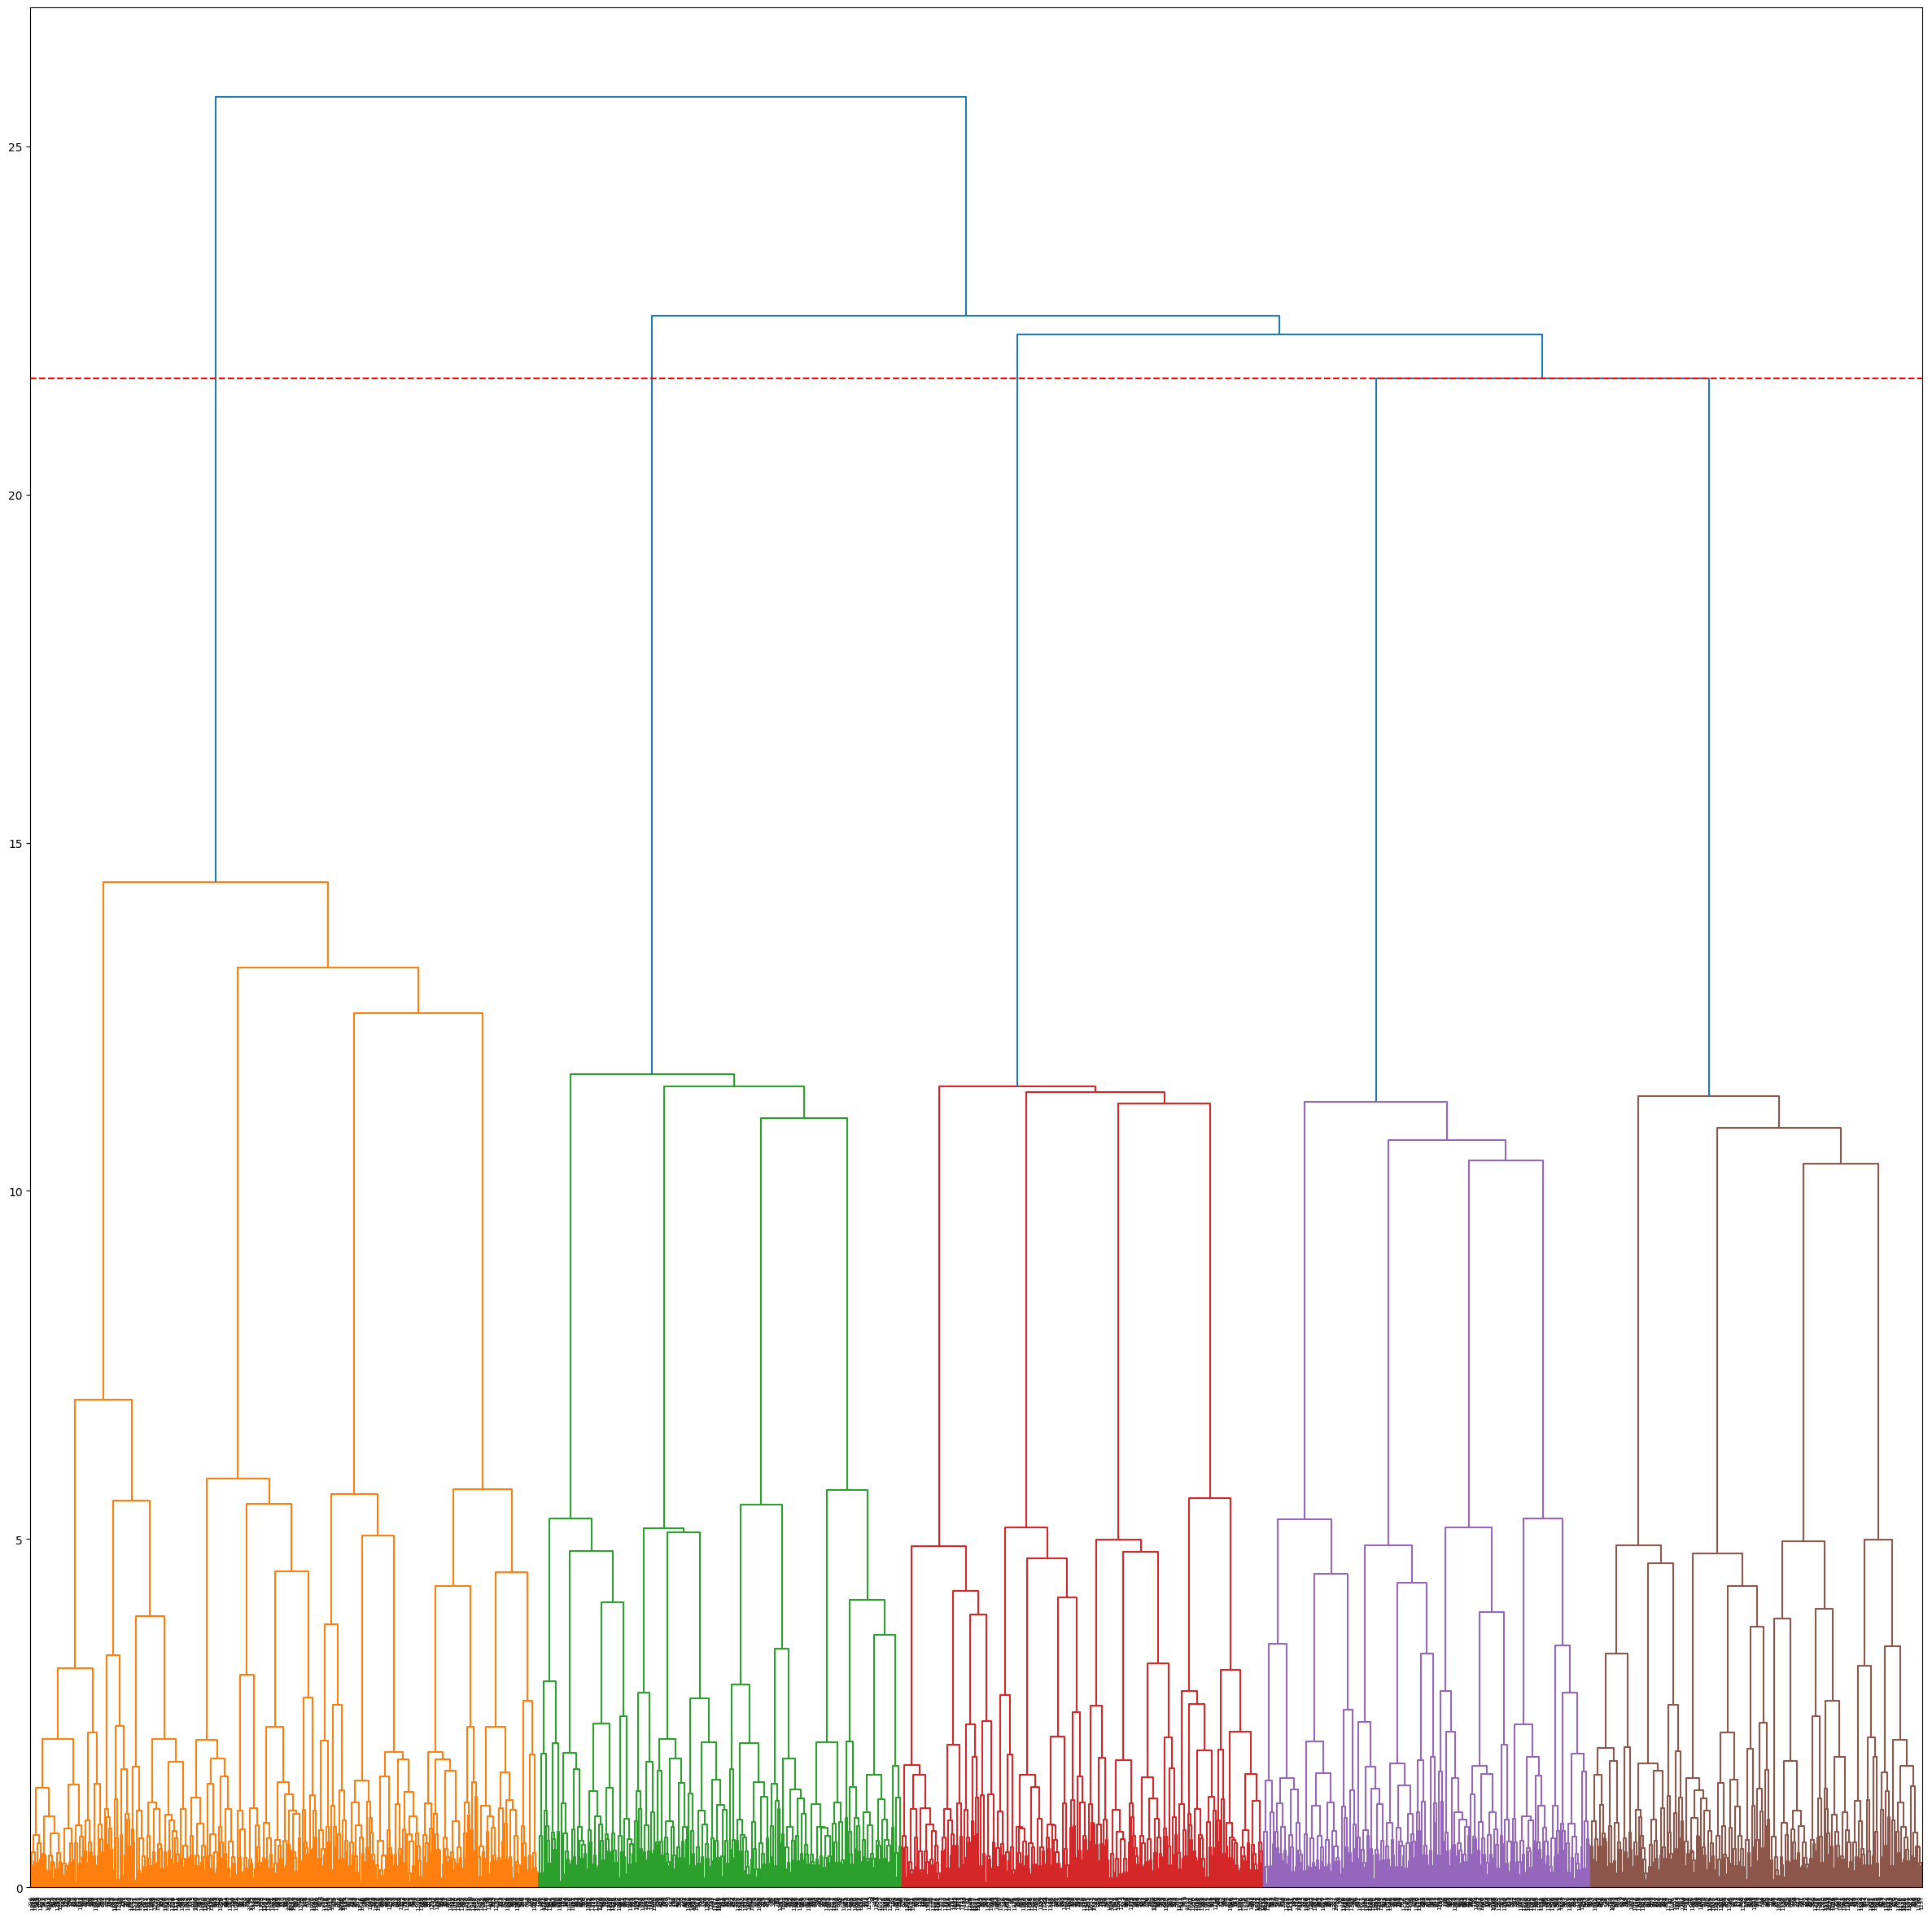

In [146]:
#                                 Question 3 


from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
dendrogram(linkage(X_scaled, method='ward'))
plt.axhline(y=21.67, c='r', linestyle='--')
plt.show()

In [147]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Create and fit the AgglomerativeClustering model
agg_cluster = AgglomerativeClustering(distance_threshold=21.67, n_clusters=None, linkage='ward').fit(X_scaled)

# Extract the number of clusters formed
num_clusters = len(set(agg_cluster.labels_))

# Print the number of clusters
print(f"Number of clusters formed: {num_clusters}")

# Hence we see that for the threshold of 21.67or 22 , we get 4 clusters 

Number of clusters formed: 4


In [148]:
#                                  Queston 4 

# Extracting labels and compute cluster sizes
labels = agg_cluster.labels_
cluster_size = np.unique(labels, return_counts=True)


for cluster, size in zip(cluster_size[0], cluster_size[1],):
    print(f'Cluster {cluster}: {size}')

Cluster 0: 466
Cluster 1: 359
Cluster 2: 257
Cluster 3: 256


In [149]:
#                                        Question 5 
import numpy as np

# Defining  dictionaries to store cluster data
cluster_scaled_dict = {}
cluster_original_dict = {}
cluster_df_dict = {}

# Creating a set of unique cluster labels
unique_labels_set = set(labels)

# Create a dictionary to store indices of each cluster
labels_indices_dict = {}
for label in unique_labels_set:
    labels_indices_dict[label] = np.where(labels == label)

# Populate dictionaries with cluster data
for key, indices_arr in labels_indices_dict.items():
    indices = indices_arr[0]
    cluster_scaled_dict[key] = X_scaled.values[indices]
    cluster_original_dict[key] = scaler.inverse_transform(cluster_scaled_dict[key])
    cluster_df_dict[key] = pd.DataFrame(cluster_original_dict[key], columns=X.columns)

# Print average age for each cluster
for label in unique_labels_set:
    print(f'mean age of cluster {label}: {cluster_df_dict[label]["age"].mean():.2f}')

mean age of cluster 0: 39.95
mean age of cluster 1: 39.08
mean age of cluster 2: 39.53
mean age of cluster 3: 37.71


In [150]:
#                      Question 6 

#Qes6
for label in unique_labels_set:
    print(f'Cluster median of avg_steps {label} is: {cluster_df_dict[label]["avg_steps_per_day"].median():.2f}')

Cluster median of avg_steps 0 is: 8000.00
Cluster median of avg_steps 1 is: 7900.00
Cluster median of avg_steps 2 is: 7800.00
Cluster median of avg_steps 3 is: 8100.00


In [151]:
#                           Question 7 

#Qes7
# Calculatin required statistics for each cluster
stats = {
    cluster: {
        'age_mean': cluster_df_dict[cluster]['age'].mean(),
        'northeast_ratio_mean': cluster_df_dict[cluster]['northeast'].mean(),
        'southeast_ratio_mean': cluster_df_dict[cluster]['southeast'].mean(),
        'female_count': (cluster_df_dict[cluster]['sex'] == 0).sum(),
        'engineer_count': (cluster_df_dict[cluster]['occupation_Engineer'] == 1).sum(),
        'smoker_count': (cluster_df_dict[cluster]['smoker'] == 'yes').sum()
    }
    for cluster in cluster_df_dict
}

# Evaluate statements
statements = {
    '1': all(stats[1]['northeast_ratio_mean'] >= stats[cluster]['northeast_ratio_mean'] for cluster in stats if cluster != 1),
    '2': all(stats[1]['age_mean'] < stats[cluster]['age_mean'] for cluster in stats if cluster != 1),
    '3': all(stats[1]['southeast_ratio_mean'] >= stats[cluster]['southeast_ratio_mean'] for cluster in stats if cluster != 1),
    '4': all(stats[1]['southeast_ratio_mean'] <= stats[cluster]['southeast_ratio_mean'] for cluster in stats if cluster != 1),
    '5': stats[1]['engineer_count'] == 0,
    '6': all(stats[1]['northeast_ratio_mean'] <= stats[cluster]['northeast_ratio_mean'] for cluster in stats if cluster != 1),
    '7': stats[1]['female_count'] > len(cluster_df_dict[1]) / 2,
    '8': stats[1]['smoker_count'] > max(stats[cluster]['smoker_count'] for cluster in stats) / 2
}

# Print the results
for statement, result in statements.items():
    print(f"Line {statement}: {result}")

Line 1: False
Line 2: False
Line 3: True
Line 4: False
Line 5: True
Line 6: True
Line 7: False
Line 8: False


In [152]:

#                                  Question 8 
# Store cluster_data_dict[2] in a variable
cluster_2_data = cluster_data_dict[2]

# Define a list of statements in the specified sequence
statements = [
    # Statement 1: Instances in Cluster 2 are either Doctor or Teacher.
    cluster_2_data[['occupation_Doctor', 'occupation_Teacher']].any(axis=1).all(),

    # Statement 6: Instances in Cluster 2 are all Engineers.
    (cluster_2_data['occupation_Engineer'] == 1).all(),

    # Statement 2: Instances in cluster 2 are, on average, younger than the other three clusters.
    cluster_2_data['age'].mean() < min(cluster_data_dict[0]['age'].mean(), cluster_data_dict[1]['age'].mean(), cluster_data_dict[3]['age'].mean()),

    # Statement 4: Instances in Cluster 2 in average have the highest gym_frequency but in average they are spending less time in the gym.
    cluster_2_data['gym_frequency'].mean() > max(cluster_data_dict[0]['gym_frequency'].mean(), cluster_data_dict[1]['gym_frequency'].mean(), cluster_data_dict[3]['gym_frequency'].mean()) and
    cluster_2_data['time_spent_in_gym'].mean() < min(cluster_data_dict[0]['time_spent_in_gym'].mean(), cluster_data_dict[1]['time_spent_in_gym'].mean(), cluster_data_dict[3]['time_spent_in_gym'].mean()),

    # Statement 5: Most of the instances in Cluster 2 are females.
    cluster_2_data['sex'].value_counts().idxmax() == 0,

    # Statement 3: Instances in Cluster 2 in average have the highest gym_frequency and time_spend_in_gym.
    cluster_2_data['gym_frequency'].mean() > max(cluster_data_dict[0]['gym_frequency'].mean(), cluster_data_dict[1]['gym_frequency'].mean(), cluster_data_dict[3]['gym_frequency'].mean()) and
    cluster_2_data['time_spent_in_gym'].mean() > max(cluster_data_dict[0]['time_spent_in_gym'].mean(), cluster_data_dict[1]['time_spent_in_gym'].mean(), cluster_data_dict[3]['time_spent_in_gym'].mean())
]

# Output the results
for i, statement in enumerate(statements, start=1):
    print(f"Statement {i}: {statement}")

Statement 1: False
Statement 2: False
Statement 3: False
Statement 4: False
Statement 5: False
Statement 6: True


In [153]:
#                                     Question 9


# Defining statements in the specified sequence
statements = [
    # Statement : The majority (more than 50 percent) of instances in Cluster 3 are in the northwest region.
    (cluster_data_dict[3]['northwest'].mean() > 0.5),

    # Statement : Cluster 3 has the lowest rate of smokers.
    ((cluster_data_dict[3]['smoker'] == 0).mean() < min((cluster_data_dict[0]['smoker'] == 0).mean(),
                                                        (cluster_data_dict[1]['smoker'] == 0).mean(),
                                                        (cluster_data_dict[2]['smoker'] == 0).mean())),

    # Statement : In Cluster 3, individuals tend to spend more time in the gym on average.
    (cluster_data_dict[3]['time_spent_in_gym'].mean() > max(cluster_data_dict[0]['time_spent_in_gym'].mean(),
                                                            cluster_data_dict[1]['time_spent_in_gym'].mean(),
                                                            cluster_data_dict[2]['time_spent_in_gym'].mean())),

    # Statement : All instances in Cluster 3 are artists.
    ((cluster_data_dict[3]['occupation_Artist'] == 1).all())
]

# Output the results
for i, statement in enumerate(statements, start=1):
    print(f"Statement {i}: {statement}")

#As we can see all the options are incorrect and we would be 

Statement 1: False
Statement 2: False
Statement 3: False
Statement 4: False


In [154]:
#                            Question 10 
# Calculate the number of instances with zero children in each cluster
zero_children_count = [
    (cluster_data_dict[2]['children'] == 0).sum(),
    (cluster_data_dict[3]['children'] == 0).sum(),
    (cluster_data_dict[0]['children'] == 0).sum(),
    (cluster_data_dict[1]['children'] == 0).sum()
]

# Output the results
for i, count in enumerate(zero_children_count, start=1):
    print(f"Cluster {i} instances with zero children: {count}")
    

Cluster 1 instances with zero children: 91
Cluster 2 instances with zero children: 108
Cluster 3 instances with zero children: 203
Cluster 4 instances with zero children: 151


In [155]:
#                                Question 11
from sklearn.cluster import KMeans
import pandas as pd

# Initialize KMeans model
custom_kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")

# Fit the model to the scaled data
custom_kmeans.fit(X_scaled)

# Calculate cluster counts
cluster_counts = custom_kmeans.labels_
cluster_counts_series = pd.Series(cluster_counts).value_counts().sort_index()

# Output the cluster counts
for i, count in cluster_counts_series.items():
    print(f"Cluster {i} count: {count}")

Cluster 0 count: 321
Cluster 1 count: 326
Cluster 2 count: 365
Cluster 3 count: 326


In [156]:
labels = custom_kmeans.labels_

# Define dictionaries to store cluster data
cluster_scaled_dict = {}
cluster_original_dict = {}
cluster_kmeans_dict = {}

# Create a set of unique cluster labels
unique_labels_set = set(labels)

# Create a dictionary to store indices of each cluster
labels_indices_dict = {}
for label in unique_labels_set:
    labels_indices_dict[label] = np.where(labels == label)

# Populate dictionaries with cluster data
for key, indices_arr in labels_indices_dict.items():
    indices = indices_arr[0]
    cluster_scaled_dict[key] = X_scaled.values[indices]
    cluster_original_dict[key] = scaler.inverse_transform(cluster_scaled_dict[key])
    cluster_kmeans_dict[key] = pd.DataFrame(cluster_original_dict[key], columns=X.columns)

In [157]:
#                                       Question 12
# Define statements in the specified sequence
statements = [
    # Statement 1: Cluster 0 has the highest smoker rate among the KMeans clusters.
    (cluster_kmeans_dict[0]['smoker'] == 1).mean() > max((cluster_kmeans_dict[1]['smoker'] == 1).mean(),
                                                         (cluster_kmeans_dict[2]['smoker'] == 1).mean(),
                                                         (cluster_kmeans_dict[3]['smoker'] == 1).mean()),

    # Statement 2: More than 50 percent of instances in Cluster 0 go to the gym at least three days a week.
    (cluster_kmeans_dict[0]['gym_frequency'] >= 3).mean() > 0.5,

    # Statement 3: More than 50 percent of instances in Cluster 0 spend less than 30 minutes in the gym.
    (cluster_kmeans_dict[0]['time_spent_in_gym'] < 30).mean() > 0.5,

    # Statement 4: Almost half of the instances in Cluster 0 are identified as males.
    (cluster_kmeans_dict[0]['sex'] == 0).mean() > 0.5,

    # Statement 5: The majority of instances in Cluster 0 are from the northeast region.
    cluster_kmeans_dict[0]['northeast'].mean() > 0.5,

    # Statement 6: Cluster 0 has the highest average number of steps per day.
    cluster_kmeans_dict[0]['avg_steps_per_day'].mean() > max(cluster_kmeans_dict[1]['avg_steps_per_day'].mean(),
                                                             cluster_kmeans_dict[2]['avg_steps_per_day'].mean(),
                                                             cluster_kmeans_dict[3]['avg_steps_per_day'].mean()),

    # Statement 7: The average age in Cluster 0 is higher than in the other three clusters.
    cluster_kmeans_dict[0]['age'].mean() > max(cluster_kmeans_dict[1]['age'].mean(),
                                               cluster_kmeans_dict[2]['age'].mean(),
                                               cluster_kmeans_dict[3]['age'].mean())
]

# Output the results
for i, statement in enumerate(statements, start=1):
    print(f"Statement {i}: {statement}")

Statement 1: True
Statement 2: False
Statement 3: False
Statement 4: True
Statement 5: False
Statement 6: False
Statement 7: True


In [158]:
#                             Question 13
# Define a list of statements following the specified sequence
statements = [
    # Statement 1: Number of instances with children in Cluster 0
    (cluster_kmeans_dict[0]['children'] == 1).sum(),

    # Statement 2: Number of instances with children in Cluster 1
    (cluster_kmeans_dict[1]['children'] == 1).sum(),

    # Statement 3: Number of instances with children in Cluster 2
    (cluster_kmeans_dict[2]['children'] == 1).sum(),

    # Statement 4: Number of instances with children in Cluster 3
    (cluster_kmeans_dict[3]['children'] == 1).sum()
]

# Output the results
for i, statement in enumerate(statements, start=1):
    print(f"Statement {i}: {statement}")

Statement 1: 78
Statement 2: 82
Statement 3: 100
Statement 4: 77


In [159]:
#                             Question 14 
# Define statements in the specified sequence
statements = [
    # Statement 6: The majority of instances in Cluster 1 are from the Northwest region.
    cluster_kmeans_dict[1]['northwest'].mean() > 0.5,

    # Statement 4: Cluster 1 has the highest smoker rate among the KMeans clusters.
    (cluster_kmeans_dict[1]['smoker'] == 1).mean() > max((cluster_kmeans_dict[0]['smoker'] == 1).mean(),
                                                         (cluster_kmeans_dict[2]['smoker'] == 1).mean(),
                                                         (cluster_kmeans_dict[3]['smoker'] == 1).mean()),

    # Statement 1: More than 50 percent of instances in Cluster 1 spend less than 30 minutes in the gym.
    (cluster_kmeans_dict[1]['time_spent_in_gym'] < 30).mean() > 0.5,

    # Statement 7: The average BMI among instances in Cluster 1 is higher than the other three clusters.
    cluster_kmeans_dict[1]['bmi'].mean() > max(cluster_kmeans_dict[0]['bmi'].mean(),
                                                cluster_kmeans_dict[2]['bmi'].mean(),
                                                cluster_kmeans_dict[3]['bmi'].mean()),

    # Statement 3: The majority of instances in Cluster 1 are from the northeast region.
    cluster_kmeans_dict[1]['northeast'].mean() > 0.5,

    # Statement 5: All instances in Cluster 1 are identified as males.
    (cluster_kmeans_dict[1]['sex'] == 0).all(),

    # Statement 2: The average age in Cluster 1 is higher than in the other three clusters.
    cluster_kmeans_dict[1]['age'].mean() > max(cluster_kmeans_dict[0]['age'].mean(),
                                               cluster_kmeans_dict[2]['age'].mean(),
                                               cluster_kmeans_dict[3]['age'].mean())
]

# Output the results
for i, statement in enumerate(statements, start=1):
    print(f"Statement {i}:", statement)

Statement 1: True
Statement 2: False
Statement 3: False
Statement 4: False
Statement 5: False
Statement 6: False
Statement 7: False


In [160]:
#Questinon15
# Statement 1: The smoking rate in cluster 2 is the highest among all the k-means clusters.
statement_1 = (cluster_kmeans_dict[2]['smoker'] == 0).mean() > max((cluster_kmeans_dict[0]['smoker'] == 0).mean(),
                                                                  (cluster_kmeans_dict[1]['smoker'] == 0).mean(),
                                                                  (cluster_kmeans_dict[3]['smoker'] == 0).mean())

print("Statement 1:", statement_1)

# Statement 2: The smoking rate in cluster 2 is the lowest among all the k-means clusters.
statement_2 = (cluster_kmeans_dict[2]['smoker'] == 0).mean() < min((cluster_kmeans_dict[0]['smoker'] == 0).mean(),
                                                                  (cluster_kmeans_dict[1]['smoker'] == 0).mean(),
                                                                  (cluster_kmeans_dict[3]['smoker'] == 0).mean())

print("Statement 2:", statement_2)

# Statement 3: The average BMI in cluster 2 is the lowest among all the k-means clusters.
statement_3 = cluster_kmeans_dict[2]['bmi'].mean() < min(cluster_kmeans_dict[0]['bmi'].mean(),
                                                         cluster_kmeans_dict[1]['bmi'].mean(),
                                                         cluster_kmeans_dict[3]['bmi'].mean())

print("Statement 3:", statement_3)

# Statement 4: The average age in cluster 2 is the highest among all the k-means clusters.
statement_4 = cluster_kmeans_dict[2]['age'].mean() > max(cluster_kmeans_dict[0]['age'].mean(),
                                                         cluster_kmeans_dict[1]['age'].mean(),
                                                         cluster_kmeans_dict[3]['age'].mean())

print("Statement 4:", statement_4)

# Statement 5: The average age in cluster 2 is the lowest among all the k-means clusters.
statement_5 = cluster_kmeans_dict[2]['age'].mean() < min(cluster_kmeans_dict[0]['age'].mean(),
                                                         cluster_kmeans_dict[1]['age'].mean(),
                                                         cluster_kmeans_dict[3]['age'].mean())

print("Statement 5:", statement_5)

# Statement 6: More than 75 percent of instances in Cluster 2 spend 30 minutes or more in the gym.
statement_6 = ((cluster_kmeans_dict[2]['time_spent_in_gym'] >= 30).sum()) / len(cluster_kmeans_dict[2]) > 0.75

print("Statement 6:", statement_6)

# Statement 7: The average BMI in cluster 2 is the highest among all the k-means clusters.
statement_7 = cluster_kmeans_dict[2]['bmi'].mean() > max(cluster_kmeans_dict[0]['bmi'].mean(),
                                                         cluster_kmeans_dict[1]['bmi'].mean(),
                                                         cluster_kmeans_dict[3]['bmi'].mean())
# Output T or F for each statement
print("Statement 1:", statement_1)
print("Statement 2:", statement_2)
print("Statement 3:", statement_3)
print("Statement 4:", statement_4)
print("Statement 5:", statement_5)
print("Statement 6:", statement_6)
print("Statement 7:", statement_7)

Statement 1: True
Statement 2: False
Statement 3: False
Statement 4: False
Statement 5: False
Statement 6: False
Statement 1: True
Statement 2: False
Statement 3: False
Statement 4: False
Statement 5: False
Statement 6: False
Statement 7: True


In [161]:
#Question16
# Print the number of instances in cluster 2 with each occupation
print("Number of Artists in Cluster 2:", (cluster_kmeans_dict[2]['occupation_Artist'] == 1).sum())
print("Number of Doctors in Cluster 2:", (cluster_kmeans_dict[2]['occupation_Doctor'] == 1).sum())
print("Number of Engineers in Cluster 2:", (cluster_kmeans_dict[2]['occupation_Engineer'] == 1).sum())
print("Number of Others in Cluster 2:", (cluster_kmeans_dict[2]['occupation_Other'] == 1).sum())
print("Number of Teachers in Cluster 2:", (cluster_kmeans_dict[2]['occupation_Teacher'] == 1).sum())

Number of Artists in Cluster 2: 67
Number of Doctors in Cluster 2: 66
Number of Engineers in Cluster 2: 63
Number of Others in Cluster 2: 112
Number of Teachers in Cluster 2: 57


In [162]:
# Count the occurrences of each value in the 'gym_frequency' column of Cluster 3
gym_frequency_counts = cluster_kmeans_dict[3]['gym_frequency'].value_counts()

# Print the counts
print("Gym Frequency Counts in Cluster 3:")
print(gym_frequency_counts)

Gym Frequency Counts in Cluster 3:
gym_frequency
3.0    117
2.0     97
0.0     69
1.0     43
Name: count, dtype: int64


In [163]:
# Statement 1: About half of the instances in Cluster 3 are identified as females.
statement_1 = 0.45 < (cluster_kmeans_dict[3]['sex'] == 0).mean() < 0.55

print("Statement 1:", statement_1)

# Statement 2: Only about one-third of instances in Cluster 3 have 2 or more children.
statement_2 = 0.3 < (cluster_kmeans_dict[3]['children'] >= 2).mean() < 0.4

print("Statement 2:", statement_2)

# Statement 3: Cluster 3 has the highest rate of smokers compared to the other three clusters.
statement_3 = (cluster_kmeans_dict[3]['smoker'] == 0).mean() > (cluster_kmeans_dict[0]['smoker'] == 0).mean() and \
              (cluster_kmeans_dict[3]['smoker'] == 0).mean() > (cluster_kmeans_dict[1]['smoker'] == 0).mean() and \
              (cluster_kmeans_dict[3]['smoker'] == 0).mean() > (cluster_kmeans_dict[2]['smoker'] == 0).mean()

print("Statement 3:", statement_3)

# Statement 4: All instances in Cluster 3 are females.
statement_4 = (cluster_kmeans_dict[3]['sex'] == 0).all()

print("Statement 4:", statement_4)

# Statement 5: Spending time in the gym every day is the most popular choice among instances in the Cluster 3.
statement_5 = (cluster_kmeans_dict[3]['gym_frequency'] == 3).sum() / len(cluster_kmeans_dict[3]) > \
              (cluster_kmeans_dict[3]['gym_frequency'] == 0).sum() / len(cluster_kmeans_dict[0]) and \
              (cluster_kmeans_dict[3]['gym_frequency'] == 3).sum() / len(cluster_kmeans_dict[3]) > \
              (cluster_kmeans_dict[3]['gym_frequency'] == 2).sum() / len(cluster_kmeans_dict[2]) and \
              (cluster_kmeans_dict[3]['gym_frequency'] == 3).sum() / len(cluster_kmeans_dict[3]) > \
              (cluster_kmeans_dict[3]['gym_frequency'] == 1).sum() / len(cluster_kmeans_dict[1])

print("Statement 5:", statement_5)

# Statement 6: The average age in cluster 3 is the lowest among all the k-means clusters.
statement_6 = cluster_kmeans_dict[3]['age'].mean() < cluster_kmeans_dict[0]['age'].mean() and \
              cluster_kmeans_dict[3]['age'].mean() < cluster_kmeans_dict[1]['age'].mean() and \
              cluster_kmeans_dict[3]['age'].mean() < cluster_kmeans_dict[2]['age'].mean()

print("Statement 6:", statement_6)

# Statement 7: The average BMI in cluster 3 is the highest among all the k-means clusters.
statement_7 = cluster_kmeans_dict[3]['bmi'].mean() > cluster_kmeans_dict[0]['bmi'].mean() and \
              cluster_kmeans_dict[3]['bmi'].mean() > cluster_kmeans_dict[1]['bmi'].mean() and \
              cluster_kmeans_dict[3]['bmi'].mean() > cluster_kmeans_dict[2]['bmi'].mean()

print("Statement 7:", statement_7)

# Statement 8: The average age in cluster 3 is the highest among all the k-means clusters.
statement_8 = cluster_kmeans_dict[3]['age'].mean() > cluster_kmeans_dict[0]['age'].mean() and \
              cluster_kmeans_dict[3]['age'].mean() > cluster_kmeans_dict[1]['age'].mean() and \
              cluster_kmeans_dict[3]['age'].mean() > cluster_kmeans_dict[2]['age'].mean()

print("Statement 8:", statement_8)

# Statement 9: The average BMI in cluster 3 is the lowest among all the k-means clusters.
statement_9 = cluster_kmeans_dict[3]['bmi'].mean() < cluster_kmeans_dict[0]['bmi'].mean() and \
              cluster_kmeans_dict[3]['bmi'].mean() < cluster_kmeans_dict[1]['bmi'].mean() and \
              cluster_kmeans_dict[3]['bmi'].mean() < cluster_kmeans_dict[2]['bmi'].mean()

print("Statement 9:", statement_9)

Statement 1: False
Statement 2: True
Statement 3: False
Statement 4: True
Statement 5: True
Statement 6: False
Statement 7: False
Statement 8: False
Statement 9: False


In [164]:
#Q18
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


silhouette_scores = []

for n_clusters in range(2, 10):

    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
    

    cluster_labels = kmeans.fit_predict(X_scaled)
    

    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))

# Find the number of clusters with the highest silhouette score
best_cluster, best_score = max(silhouette_scores, key=lambda x: x[1])

# Print the number of clusters with the highest silhouette score
print(f"The number of clusters with the highest silhouette score is: {best_cluster}")

The number of clusters with the highest silhouette score is: 6


In [165]:
#Q19
# Use the previously computed best number of clusters
best_n_clusters = best_cluster

# Create KMeans model with the optimal number of clusters
kmeans_best = KMeans(n_clusters=best_n_clusters, random_state=0, n_init="auto")

# Fit the model and predict cluster labels
best_cluster_labels = kmeans_best.fit_predict(X_scaled)

# Compute silhouette score
best_silhouette_score = silhouette_score(X_scaled, best_cluster_labels)

# Print the silhouette score with two digits after the decimal point
print(f"The silhouette score for KMeans clustering with {best_n_clusters} clusters is: {best_silhouette_score:.2f}")

The silhouette score for KMeans clustering with 6 clusters is: 0.18


In [166]:
#Question 20 
from sklearn.cluster import AgglomerativeClustering

# Import silhouette_score function
from sklearn.metrics import silhouette_score

# Initialize variables to store the best silhouette score and the corresponding number of clusters
best_silhouette_score = -1
best_n_clusters = -1

# Iterate over the range of clusters
for n_clusters in range(2, 10):
    # Create Agglomerative clustering model
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=None, linkage='ward')
    
    # Fit the model and predict cluster labels
    cluster_labels = agglomerative.fit_predict(X_scaled)
    
    # Compute silhouette score
    silhouette = silhouette_score(X_scaled, cluster_labels)
    
    # Update the best silhouette score and the corresponding number of clusters if the current score is higher
    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_n_clusters = n_clusters

# Print the number of clusters with the highest silhouette score
print("The number of clusters with the highest silhouette score:", best_n_clusters)

The number of clusters with the highest silhouette score: 5


In [ ]:

#  Q21
for i in range(2, 10):
    if i == 5:
        Agglomerative = AgglomerativeClustering(distance_threshold=None, n_clusters=i)
        score = silhouette_score(X_scaled, Agglomerative.fit_predict(X_scaled))
        print(round(score, 2))